In [16]:
import sys

sys.path.append('/home/juanagreda/anaconda3/lib/python3.8/site-packages')

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv('studentInfo.csv')

In [3]:
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [5]:
df['id_student'].nunique()

28785

In [6]:
df.shape

(32593, 12)

In [7]:
id_counts = df['id_student'].value_counts()
id_counts.head()

584077    5
596620    4
591655    4
587122    4
585769    4
Name: id_student, dtype: int64

In [8]:
id_counts.value_counts()

1    25247
2     3293
3      221
4       23
5        1
Name: id_student, dtype: int64

In [9]:
df['imd_band'].replace(to_replace=["10-20"], value="10-20%", inplace=True)

In [10]:
df.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [11]:
df.imd_band.fillna(value = "90-100%", inplace= True)

In [12]:
df['imd_band'].value_counts().sort_index()

0-10%      3311
10-20%     3516
20-30%     3654
30-40%     3539
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    3647
Name: imd_band, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              32593 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


### Now we can see that there is no Null Values

In [ ]:
!pip install dexplot


In [ ]:
import dexplot as dxp

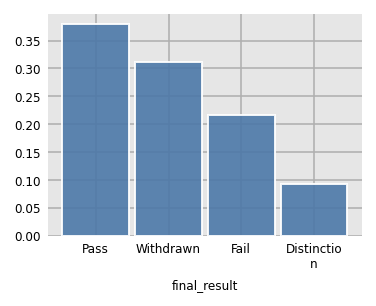

In [43]:
## Distribution of response variable normalized


dxp.count(val='final_result', data=df, normalize=True)

In [44]:
df['final_result'].value_counts()

Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64

In [47]:
(df['final_result'].value_counts())/(df.shape[0])*100

Pass           37.925321
Withdrawn      31.160065
Fail           21.636548
Distinction     9.278066
Name: final_result, dtype: float64

### As we can see, 38% Pass, 31% Withdrawn, 21% Fail and 9% have Distinction

In [32]:
!pip install dexplot

     |████████████████████████████████| 173 kB 593 kB/s eta 0:00:01


In [34]:
import dexplot as dxp

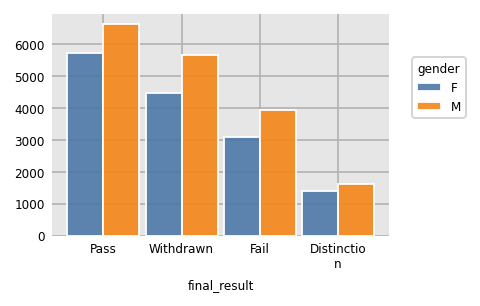

In [49]:
dxp.count('final_result', data=df, split='gender')

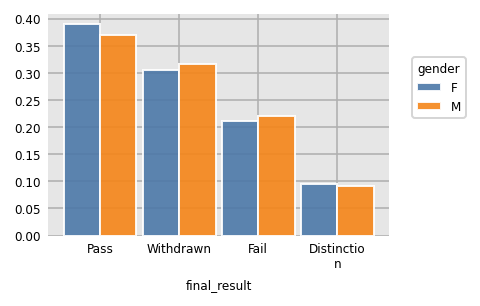

In [51]:
dxp.count('final_result', data=df, split='gender', normalize='gender')

### Gender:
Based on the analysis, it can be seen
that gender does not play a key role in the result as
it is almost the same in all 4 cases.

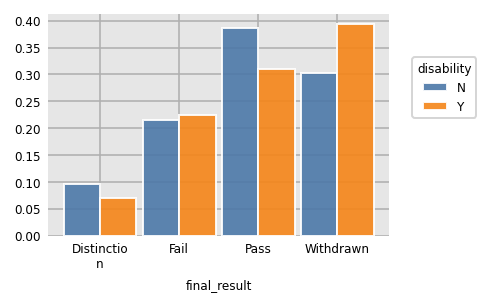

In [57]:
dxp.count('final_result', data=df, split='disability', normalize='disability')

### Disability: 
Based on the analysis, the withdrawal
rate is higher for students with disability and the
pass percent is low. This can be used as a factor that
affects the final result.

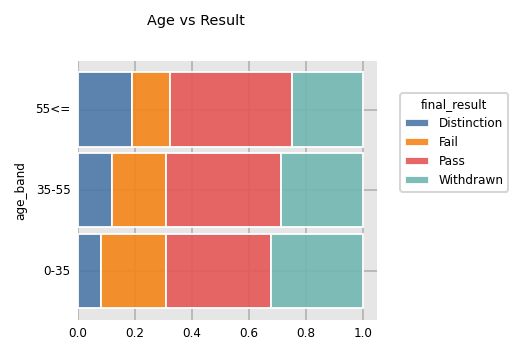

In [66]:
dxp.count(val='age_band', data=df, split='final_result', normalize='age_band', 
          orientation='h', stacked=True, title= 'Age vs Result')

### Age: 
Based on the analysis, withdrawal rate is
higher for students under 35. As the age increases,
pass percent and distinction also increases. This
can be used as a factor that affects the final result.

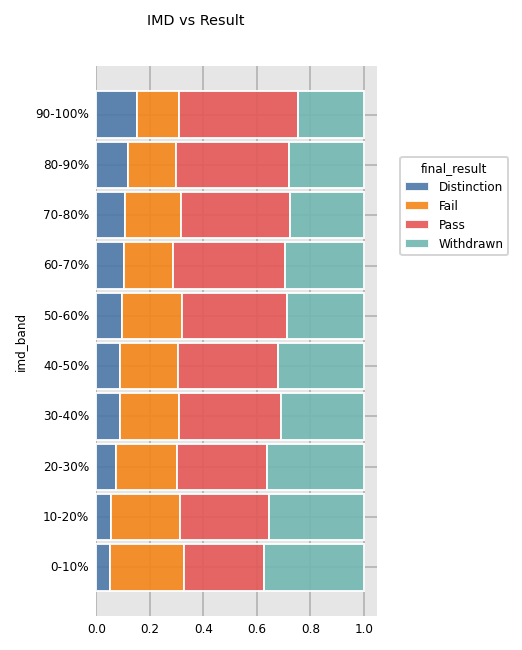

In [67]:
dxp.count(val='imd_band', data=df, split='final_result', normalize='imd_band', 
          orientation='h', stacked=True, title= 'IMD vs Result')

### IMD Band:
As this IMD rate increases, distinction
percentage increases and the fail percentage
decreases. This can be used as a factor to predict
the final result.

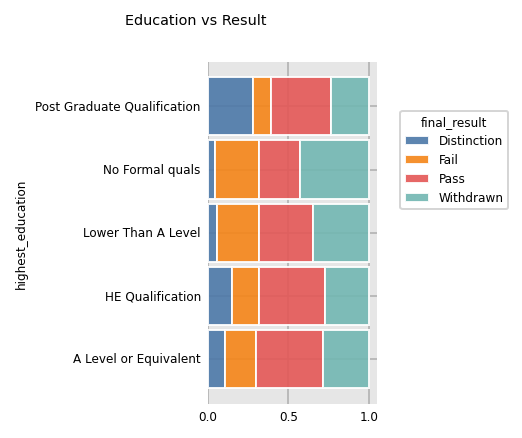

In [74]:
dxp.count(val='highest_education', data=df, split='final_result', normalize='highest_education', 
          orientation='h', stacked=True, title= 'Education vs Result')

### Education: 
Based on the analysis, the withdrawal
rate is extremely high if the students don’t have
any prior formal education. Distinction rate is
significantly high in case of post-graduation
background.

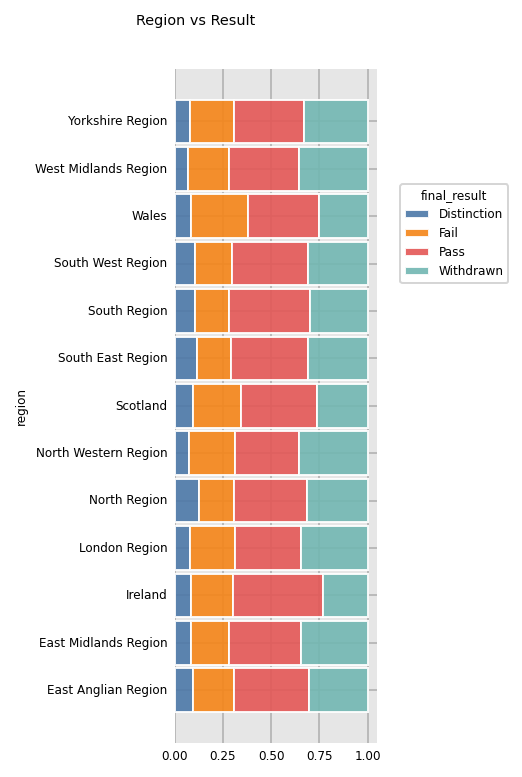

In [75]:
dxp.count(val='region', data=df, split='final_result', normalize='region', 
          orientation='h', stacked=True, title= 'Region vs Result')

### Region:
Based on the analysis, the result is
almost equally distributed. There is no significant
difference between all region and thus it is not a
distinguishing factor.